In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df_prices = pd.read_csv('data/train.csv')
print(df_prices.columns)
display(df_prices.head(5))
df_prices.info()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

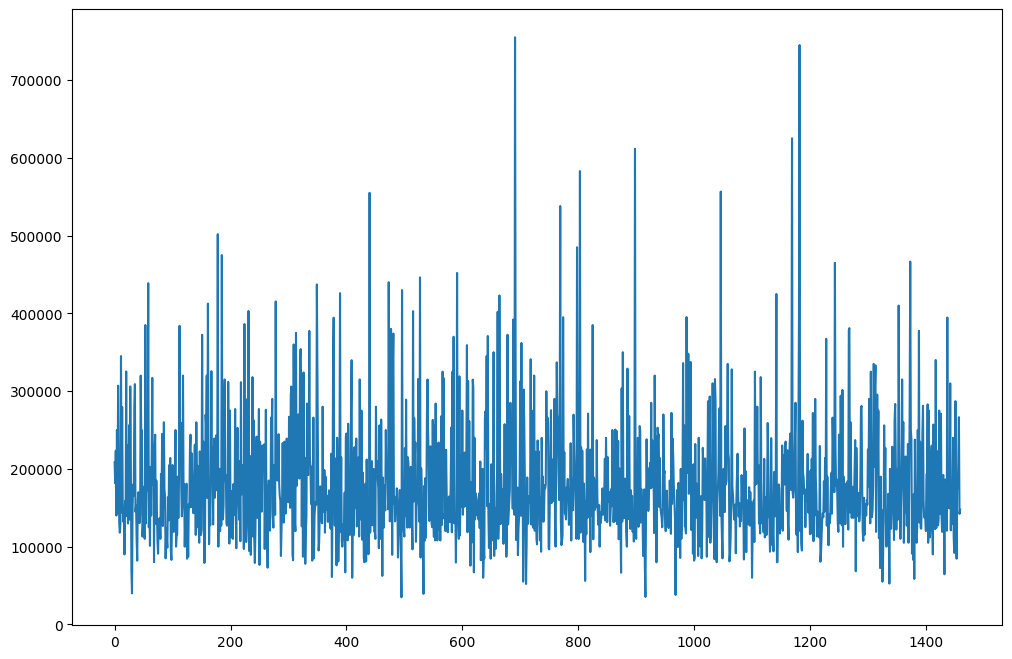

In [3]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df_prices)),df_prices['SalePrice'])

In [143]:
df_prices['SalePrice'].min()

34900

In [4]:
threshold = 400000
n_house = np.sum(df_prices['SalePrice']>threshold)/len(df_prices)
print(f"No of house above price-{threshold}:{n_house:.3f}%")
df_prices = df_prices[df_prices['SalePrice']<threshold].copy()

No of house above price-400000:0.019%


In [5]:
df_prices.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [ ]:
cat_cols = df_prices.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col} : {len(df_prices[col].unique())}")


MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6


In [11]:
print(len(df_prices))
x = df_prices.isna().sum()
nan_columns = x[x>0].index
print(x[x>0])

1432
LotFrontage      257
Alley           1341
MasVnrType       867
MasVnrArea         7
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1426
Fence           1153
MiscFeature     1378
dtype: int64


In [12]:
lst_cat_col = []
for col in nan_columns:
    lst_unique_vals = df_prices[col].unique()
    if len(lst_unique_vals) < 10 :
        print(col, ":",x[col],lst_unique_vals)
        lst_cat_col.append(col)

Alley : 1341 [nan 'Grvl' 'Pave']
MasVnrType : 867 ['BrkFace' nan 'Stone' 'BrkCmn']
BsmtQual : 37 ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond : 37 ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure : 38 ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 : 37 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 : 38 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical : 1 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu : 690 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType : 81 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish : 81 ['RFn' 'Unf' 'Fin' nan]
GarageQual : 81 ['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
GarageCond : 81 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC : 1426 [nan 'Ex' 'Fa' 'Gd']
Fence : 1153 [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature : 1378 [nan 'Shed' 'Gar2' 'Othr' 'TenC']


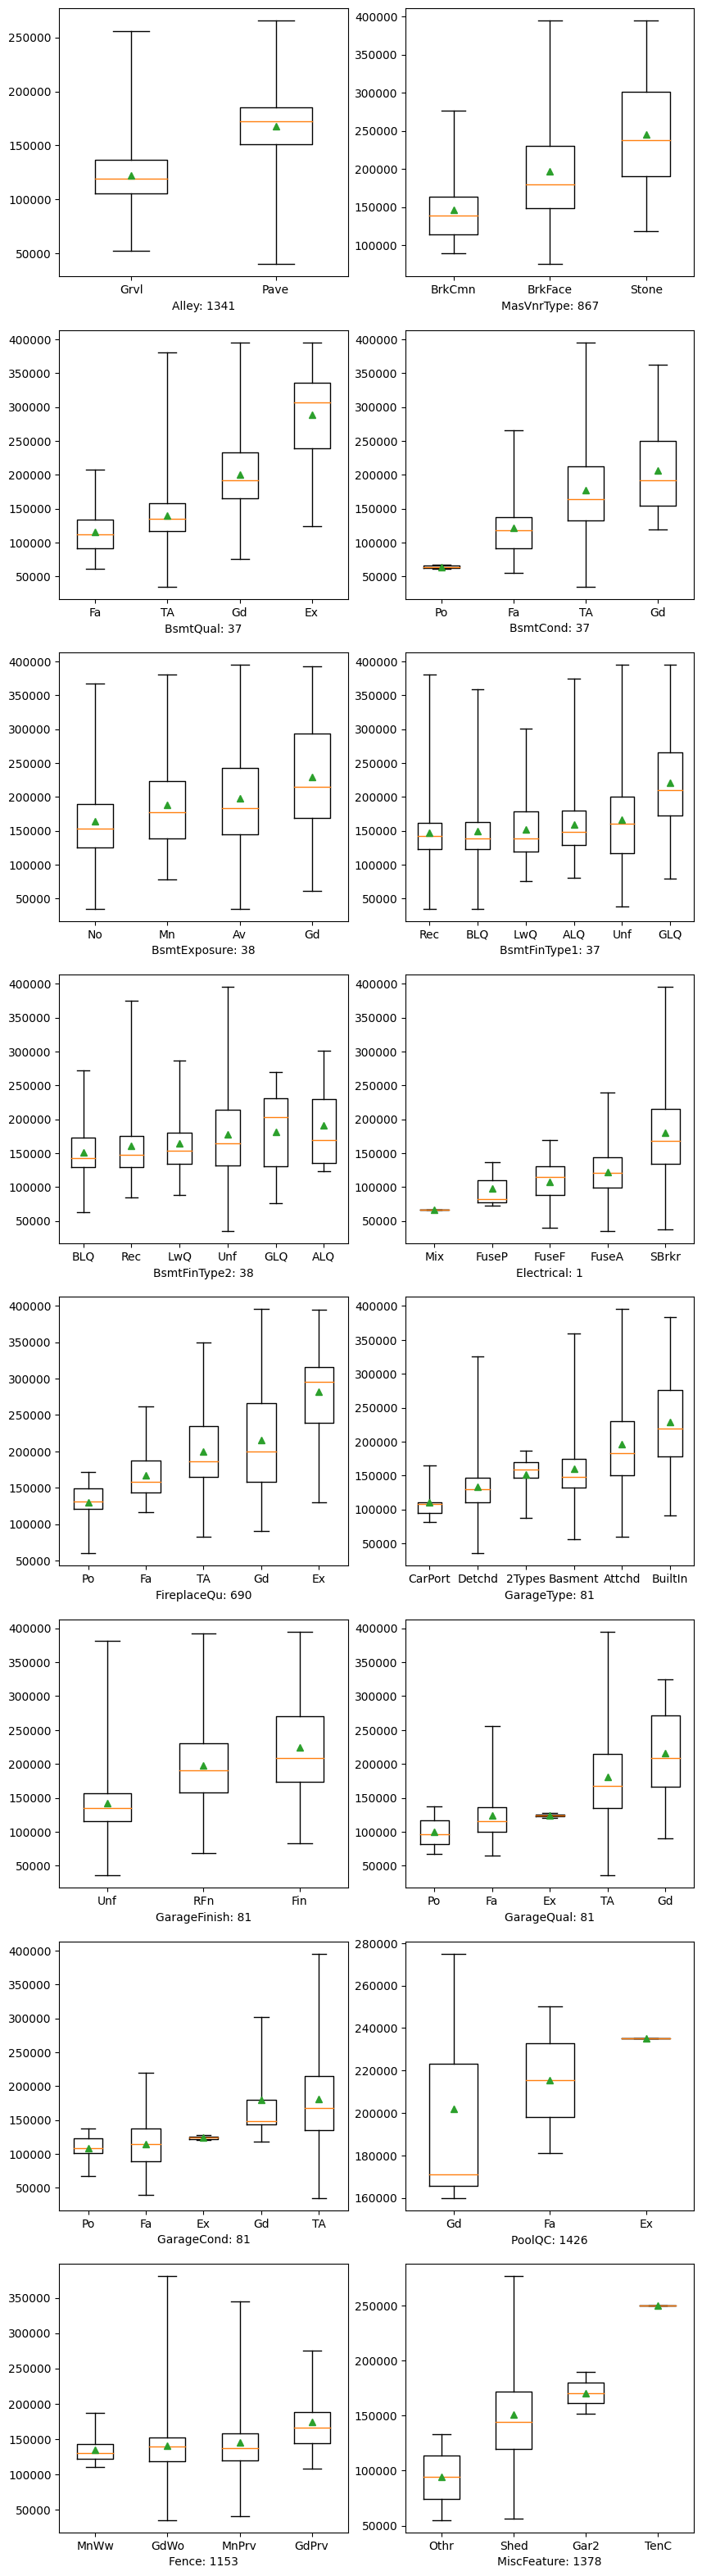

{'Alley': {'Grvl': 1, 'Pave': 2}, 'MasVnrType': {'BrkCmn': 1, 'BrkFace': 2, 'Stone': 3}, 'BsmtQual': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 'BsmtCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4}, 'BsmtExposure': {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}, 'BsmtFinType1': {'Rec': 1, 'BLQ': 2, 'LwQ': 3, 'ALQ': 4, 'Unf': 5, 'GLQ': 6}, 'BsmtFinType2': {'BLQ': 1, 'Rec': 2, 'LwQ': 3, 'Unf': 4, 'GLQ': 5, 'ALQ': 6}, 'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}, 'FireplaceQu': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 'GarageType': {'CarPort': 1, 'Detchd': 2, '2Types': 3, 'Basment': 4, 'Attchd': 5, 'BuiltIn': 6}, 'GarageFinish': {'Unf': 1, 'RFn': 2, 'Fin': 3}, 'GarageQual': {'Po': 1, 'Fa': 2, 'Ex': 3, 'TA': 4, 'Gd': 5}, 'GarageCond': {'Po': 1, 'Fa': 2, 'Ex': 3, 'Gd': 4, 'TA': 5}, 'PoolQC': {'Gd': 1, 'Fa': 2, 'Ex': 3}, 'Fence': {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}, 'MiscFeature': {'Othr': 1, 'Shed': 2, 'Gar2': 3, 'TenC': 4}}


In [13]:
fig,ax = plt.subplots(8,2,figsize=(10,40))
i=0
encodings = {}
for col in lst_cat_col:
    ai = int(i/2)
    aj = int(i%2)
    sp = df_prices.groupby(col)['SalePrice'].agg(['mean',list])
    sp_sorted = sp.sort_values(by = 'mean')
    index_map = {label:i for i,label in enumerate(sp_sorted.index,start=1)}
    encodings[col] = index_map
    
    ax[ai][aj].boxplot(sp_sorted['list'],widths=0.5,whis=[0,100],showmeans=True)
    ax[ai][aj].set_xlabel(col+": "+str(x[col]))
    # ax[ai][aj].set_xticks(range(len(sp.index)))
    ax[ai][aj].set_xticklabels(sp_sorted.index)
    # ax[ai][aj].set_title(x[col])
    i+=1
plt.show()

print(encodings)

In [14]:
encodings

{'Alley': {'Grvl': 1, 'Pave': 2},
 'MasVnrType': {'BrkCmn': 1, 'BrkFace': 2, 'Stone': 3},
 'BsmtQual': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'BsmtCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
 'BsmtExposure': {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
 'BsmtFinType1': {'Rec': 1, 'BLQ': 2, 'LwQ': 3, 'ALQ': 4, 'Unf': 5, 'GLQ': 6},
 'BsmtFinType2': {'BLQ': 1, 'Rec': 2, 'LwQ': 3, 'Unf': 4, 'GLQ': 5, 'ALQ': 6},
 'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
 'FireplaceQu': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'GarageType': {'CarPort': 1,
  'Detchd': 2,
  '2Types': 3,
  'Basment': 4,
  'Attchd': 5,
  'BuiltIn': 6},
 'GarageFinish': {'Unf': 1, 'RFn': 2, 'Fin': 3},
 'GarageQual': {'Po': 1, 'Fa': 2, 'Ex': 3, 'TA': 4, 'Gd': 5},
 'GarageCond': {'Po': 1, 'Fa': 2, 'Ex': 3, 'Gd': 4, 'TA': 5},
 'PoolQC': {'Gd': 1, 'Fa': 2, 'Ex': 3},
 'Fence': {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
 'MiscFeature': {'Othr': 1, 'Shed': 2, 'Gar2': 3, 'TenC': 4}}

In [17]:
drop_columns = ['Fence', 'PoolQC']
df_feature_encoded = df_prices.copy()

for key, val in encodings.items():
    print(key, val)
    df_feature_encoded[key] = df_feature_encoded[key].replace(val)
df_feature_encoded.drop(columns=drop_columns,axis=1,inplace=True)
df_feature_encoded.fillna(0,inplace=True)
display(df_feature_encoded.columns)


Alley {'Grvl': 1, 'Pave': 2}
MasVnrType {'BrkCmn': 1, 'BrkFace': 2, 'Stone': 3}
BsmtQual {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
BsmtCond {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4}
BsmtExposure {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
BsmtFinType1 {'Rec': 1, 'BLQ': 2, 'LwQ': 3, 'ALQ': 4, 'Unf': 5, 'GLQ': 6}
BsmtFinType2 {'BLQ': 1, 'Rec': 2, 'LwQ': 3, 'Unf': 4, 'GLQ': 5, 'ALQ': 6}
Electrical {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}
FireplaceQu {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
GarageType {'CarPort': 1, 'Detchd': 2, '2Types': 3, 'Basment': 4, 'Attchd': 5, 'BuiltIn': 6}
GarageFinish {'Unf': 1, 'RFn': 2, 'Fin': 3}
GarageQual {'Po': 1, 'Fa': 2, 'Ex': 3, 'TA': 4, 'Gd': 5}
GarageCond {'Po': 1, 'Fa': 2, 'Ex': 3, 'Gd': 4, 'TA': 5}
PoolQC {'Gd': 1, 'Fa': 2, 'Ex': 3}
Fence {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
MiscFeature {'Othr': 1, 'Shed': 2, 'Gar2': 3, 'TenC': 4}


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
display(df_feature_encoded.head(5))
obj_columns = df_feature_encoded.select_dtypes(include = 'object').columns
lst_uni_vals = []
for col in obj_columns:
    lst_uni_vals.append({col:df_feature_encoded[col].unique()})
    lst_mean = df_feature_encoded.groupby(col)['SalePrice'].agg(['mean','min','max']).sort_values(by='mean')
    print(col, "\n",lst_mean,"\n")
    encodings = {label:i for i, label in enumerate(lst_mean.index,start=1) }
    # display(df_feature_encoded.head(5))
    # print(encodings)
    df_feature_encoded[col] = df_feature_encoded[col].replace(encodings)

df_feature_encoded.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0.0,Reg,Lvl,AllPub,...,0,0,0,0.0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0.0,Reg,Lvl,AllPub,...,0,0,0,0.0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0.0,IR1,Lvl,AllPub,...,0,0,0,0.0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0.0,IR1,Lvl,AllPub,...,0,0,0,0.0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0.0,IR1,Lvl,AllPub,...,0,0,0,0.0,0,12,2008,WD,Normal,250000


MSZoning 
                    mean     min     max
MSZoning                               
C (all)    74528.000000   34900  133900
RM        124709.995392   37900  392500
RH        131558.375000   76000  200000
RL        183803.885231   39300  395192
FV        214014.061538  144152  370878 

Street 
                  mean    min     max
Street                              
Grvl    130190.500000  55993  228950
Pave    175061.445302  34900  395192 

LotShape 
                    mean     min     max
LotShape                               
Reg       161762.822052   34900  395000
IR1       197376.687898   52000  395192
IR2       203406.685714  110000  302000
IR3       216036.500000   73000  375000 

LandContour 
                       mean    min     max
LandContour                              
Bnk          143104.079365  52500  315000
Lvl          173907.774319  34900  395192
Low          203661.111111  39300  385000
HLS          220831.604167  82500  392500 

Utilities 
                

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0.0,1,2,2,...,0,0,0,0.0,0,2,2008,6,5,208500
1,2,20,4,80.0,9600,2,0.0,1,2,2,...,0,0,0,0.0,0,5,2007,6,5,181500
2,3,60,4,68.0,11250,2,0.0,2,2,2,...,0,0,0,0.0,0,9,2008,6,5,223500
3,4,70,4,60.0,9550,2,0.0,2,2,2,...,0,0,0,0.0,0,2,2006,6,2,140000
4,5,60,4,84.0,14260,2,0.0,2,2,2,...,0,0,0,0.0,0,12,2008,6,5,250000


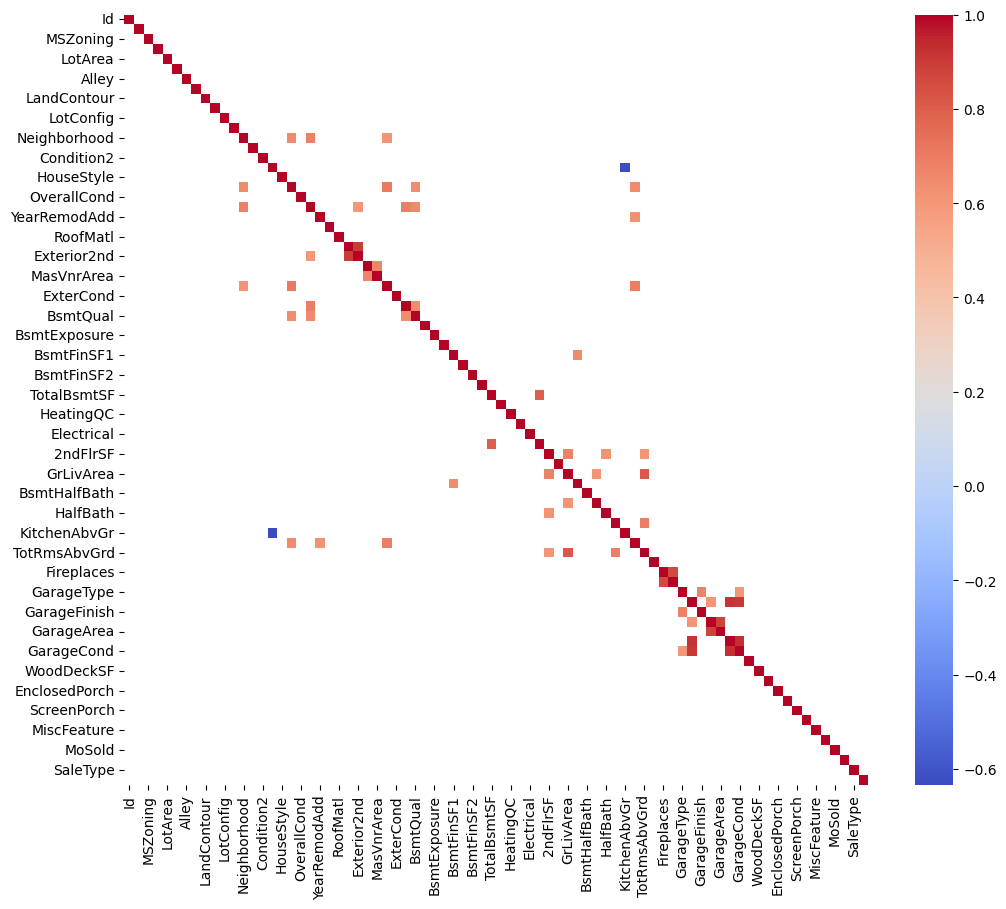

In [34]:
corr_mat = df_feature_encoded.drop(columns=['SalePrice']).corr()
high_corr = corr_mat[abs(corr_mat)>0.6]
plt.figure(figsize=(12,10))
sns.heatmap(high_corr, cmap='coolwarm')
plt.show()

In [35]:
lst_corr_feat = high_corr.abs().unstack().drop_duplicates().sort_values(ascending=False)
print(lst_corr_feat,len(lst_corr_feat))
lst_corr1 = lst_corr_feat.index.get_level_values(0)
lst_corr2 = lst_corr_feat.index.get_level_values(1)
print(lst_corr_feat[lst_corr1 == "OverallQual"])
print(lst_corr2.value_counts())
to_drop = set(col for col in lst_corr1 if col not in lst_corr2)
print(to_drop)

Id            Id              1.000000
GarageQual    GarageCond      0.923699
GarageYrBlt   GarageQual      0.921472
              GarageCond      0.905772
Exterior1st   Exterior2nd     0.902477
GarageCars    GarageArea      0.879134
Fireplaces    FireplaceQu     0.865559
GrLivArea     TotRmsAbvGrd    0.817773
TotalBsmtSF   1stFlrSF        0.799108
OverallQual   ExterQual       0.703356
ExterQual     KitchenQual     0.696082
BedroomAbvGr  TotRmsAbvGrd    0.693578
YearBuilt     Foundation      0.688983
Neighborhood  YearBuilt       0.681220
2ndFlrSF      GrLivArea       0.680856
GarageType    GarageFinish    0.675308
MasVnrType    MasVnrArea      0.669562
YearBuilt     BsmtQual        0.649245
Neighborhood  OverallQual     0.648714
OverallQual   KitchenQual     0.648058
BsmtFinSF1    BsmtFullBath    0.646676
OverallQual   BsmtQual        0.641540
Foundation    BsmtQual        0.641537
BldgType      KitchenAbvGr    0.633227
YearRemodAdd  KitchenQual     0.620372
Neighborhood  ExterQual  

In [31]:
corr_saleprice = df_feature_encoded.corr()['SalePrice'].sort_values(ascending=False)
print(corr_saleprice[:30])

SalePrice       1.000000
OverallQual     0.794784
Neighborhood    0.720249
ExterQual       0.671550
GrLivArea       0.663579
KitchenQual     0.650859
GarageCars      0.646759
BsmtQual        0.626018
GarageArea      0.624492
TotalBsmtSF     0.575020
GarageFinish    0.573863
1stFlrSF        0.564498
YearBuilt       0.558338
FullBath        0.556311
YearRemodAdd    0.538547
Foundation      0.532321
FireplaceQu     0.530145
GarageType      0.529568
TotRmsAbvGrd    0.480354
Fireplaces      0.465572
HeatingQC       0.441229
MasVnrType      0.416020
Exterior1st     0.402990
MasVnrArea      0.400894
Exterior2nd     0.387407
BsmtFinType1    0.386971
MSZoning        0.370677
BsmtExposure    0.343526
BsmtFinSF1      0.336440
WoodDeckSF      0.323554
Name: SalePrice, dtype: float64


In [137]:
df = df_feature_encoded.drop(columns=to_drop)
display(df[20:27])
df.to_csv('housing_price_corr07.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
20,21,60,4,101.0,14215,2,0.0,2,2,2,...,0,0,0,0.0,0,11,2006,8,6,325300
21,22,45,2,57.0,7449,2,1.0,1,1,2,...,0,0,0,0.0,0,6,2007,6,5,139400
22,23,20,4,75.0,9742,2,0.0,1,2,2,...,0,0,0,0.0,0,9,2008,6,5,230000
23,24,120,2,44.0,4224,2,0.0,1,2,2,...,0,0,0,0.0,0,6,2007,6,5,129900
24,25,20,4,0.0,8246,2,0.0,2,2,2,...,0,0,0,0.0,0,5,2010,6,5,154000
25,26,20,4,110.0,14230,2,0.0,1,2,2,...,0,0,0,0.0,0,7,2009,6,5,256300
26,27,20,4,60.0,7200,2,0.0,1,2,2,...,0,0,0,0.0,0,5,2010,6,5,134800


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1432 non-null   int64  
 1   MSSubClass     1432 non-null   int64  
 2   MSZoning       1432 non-null   int64  
 3   LotFrontage    1432 non-null   float64
 4   LotArea        1432 non-null   int64  
 5   Street         1432 non-null   int64  
 6   Alley          1432 non-null   float64
 7   LotShape       1432 non-null   int64  
 8   LandContour    1432 non-null   int64  
 9   Utilities      1432 non-null   int64  
 10  LotConfig      1432 non-null   int64  
 11  LandSlope      1432 non-null   int64  
 12  Condition1     1432 non-null   int64  
 13  Condition2     1432 non-null   int64  
 14  BldgType       1432 non-null   int64  
 15  HouseStyle     1432 non-null   int64  
 16  OverallCond    1432 non-null   int64  
 17  YearBuilt      1432 non-null   int64  
 18  YearRemodAdd 

## Model training

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [147]:
to_drop.update(['SalePrice','Id'])
to_drop

{'2ndFlrSF',
 'BedroomAbvGr',
 'BldgType',
 'BsmtFinSF1',
 'Exterior1st',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'Id',
 'MasVnrType',
 'Neighborhood',
 'SalePrice',
 'TotalBsmtSF',
 'YearRemodAdd'}

In [148]:
X = df_feature_encoded.drop(columns=to_drop,axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated

### PCA

In [149]:
pca = PCA()
X_pca =pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_
cumulative_variance = np.cumsum(explained_variance)

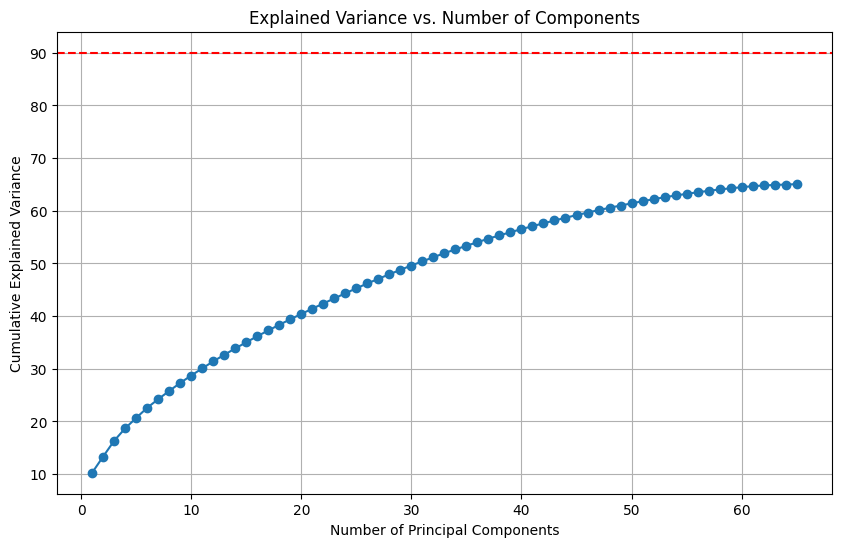

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=90, color='r', linestyle='--')  # 90% variance threshold
plt.grid()
plt.show()

### RandomForest

In [32]:
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Y = df_feature_encoded['SalePrice']
# X = df_feature_encoded.drop(columns=to_drop)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=30)

rf_model = RandomForestClassifier(n_estimators=300,random_state=30)

rf_model.fit(X_train,y_train)

In [154]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy Score:",accuracy)

cm = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix",cm)

/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Accuracy Score: 0.017421602787456445
Confusion Matrix [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [155]:
importances = rf_model.feature_importances_
print('Feature Importances')

for feature,importance in zip(X.columns,importances):
    print(f'{feature}:{importance:.4f}')

Feature Importances
MSSubClass:0.0191
MSZoning:0.0095
LotFrontage:0.0385
LotArea:0.0488
Street:0.0006
Alley:0.0046
LotShape:0.0142
LandContour:0.0080
Utilities:0.0003
LotConfig:0.0161
LandSlope:0.0040
Condition1:0.0111
Condition2:0.0017
HouseStyle:0.0152
OverallQual:0.0230
OverallCond:0.0194
YearBuilt:0.0426
RoofStyle:0.0105
RoofMatl:0.0015
Exterior2nd:0.0265
MasVnrArea:0.0280
ExterQual:0.0086
ExterCond:0.0077
Foundation:0.0113
BsmtQual:0.0124
BsmtCond:0.0078
BsmtExposure:0.0170
BsmtFinType1:0.0224
BsmtFinType2:0.0095
BsmtFinSF2:0.0108
BsmtUnfSF:0.0466
Heating:0.0025
HeatingQC:0.0166
CentralAir:0.0033
Electrical:0.0061
1stFlrSF:0.0480
LowQualFinSF:0.0023
GrLivArea:0.0493
BsmtFullBath:0.0123
BsmtHalfBath:0.0047
FullBath:0.0083
HalfBath:0.0102
KitchenAbvGr:0.0027
KitchenQual:0.0122
TotRmsAbvGrd:0.0277
Functional:0.0062
FireplaceQu:0.0180
GarageFinish:0.0158
GarageCars:0.0112
GarageArea:0.0465
GarageQual:0.0054
GarageCond:0.0045
PavedDrive:0.0042
WoodDeckSF:0.0303
OpenPorchSF:0.0315
Enclo

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
df_house = pd.read_csv('./housing_price.csv')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    df_house.drop(columns=['Id','Unnamed: 0','SalePrice']),
    df_house['SalePrice'],
    test_size=0.2
    )
print(X_train.shape)
mean_train = (X_train.mean(axis=0))
std_train = X_train.std(axis=0)

mean_ytrain = y_train.mean(axis=0)
std_ytrain = y_train.std(axis=0)

X_train = (X_train - mean_train)/std_train
X_test = (X_test - mean_train)/std_train
y_train = (y_train - mean_ytrain)/std_ytrain
y_test = (y_test - mean_ytrain)/std_ytrain



(1145, 65)


In [61]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Mean squared error",mean_squared_error(y_pred_lr,y_test))
print("R2 score :",r2_score(y_pred_lr,y_test))

Mean squared error 0.13913216446389062
R2 score : 0.8341141233986255


/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated

In [105]:
df_lr_coeff = pd.DataFrame({"feature":X_train.columns,"weight":abs(lr_model.coef_)})
df_lr_coeff.set_index("feature",inplace=True)
df_lr_coeff = df_lr_coeff/df_lr_coeff.sum()
(df_lr_coeff.sort_values(by="weight",ascending=False,inplace=True))
# for name, coef in zip(X_train.columns, lr_model.coef_):
#     print(f"{name}: {coef:.4f}")

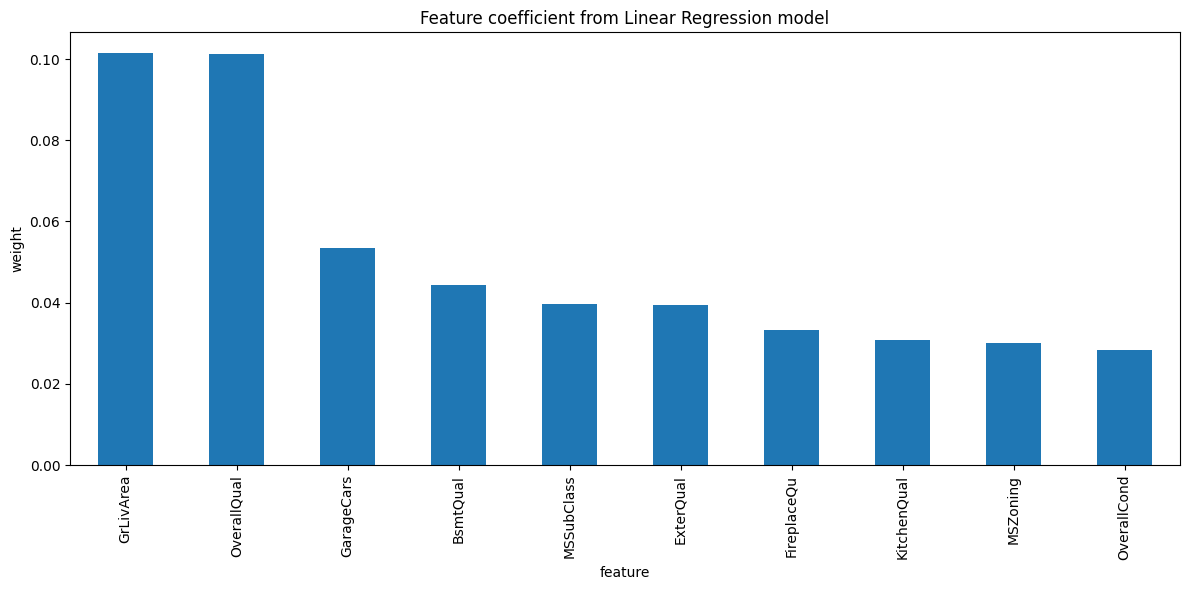

In [ ]:
df_lr_coeff[:10].plot(kind='bar',figsize=(12,6),legend=False)
plt.title("Feature coefficient(normalised) from Linear Regression model")
plt.ylabel('weight')
plt.tight_layout()
plt.show()

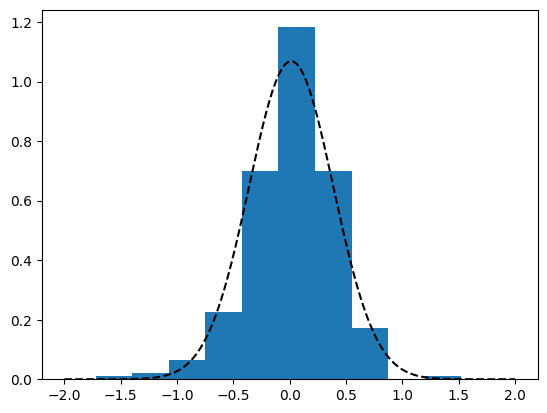

In [129]:
import seaborn as sns

residuals = y_pred_lr-y_test
std_res = residuals.std()
mean_res = residuals.mean()
x= np.linspace(-2,2,1000)
# sns.scatterplot(x=y_pred_lr,y=residuals)
plt.hist(residuals,density=True)
plt.plot(x,norm.pdf(x,mean_res,std_res),c='k',ls='--')
plt.show()

### XGBoost

In [75]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)  # y_train can be continuous

/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [76]:
y_pred_xgb = xgb_model.predict(X_test)
print("Mean squared error",mean_squared_error(y_pred_xgb,y_test))
print("R2 score :",r2_score(y_pred_xgb,y_test))

Mean squared error 0.15039570481886907
R2 score : 0.841100864541687


/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


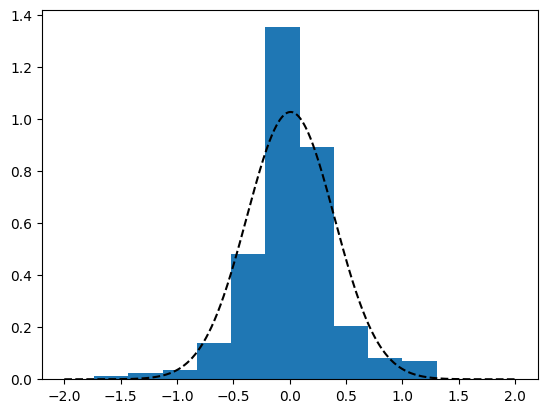

In [127]:
residuals = y_pred_xgb - y_test
res_std = residuals.std()
res_mean = residuals.mean()
x= np.linspace(-2,2,1000)
plt.hist(residuals,density=True)
plt.plot(x,norm.pdf(x,res_mean,res_std),ls='--',c='k')
plt.show()


In [113]:
booster = xgb_model.get_booster()
importance_dict = booster.get_score(importance_type="gain")
df_xgb_score = pd.DataFrame.from_dict(importance_dict,orient='index',columns=['weight'])
df_xgb_score = (df_xgb_score/(df_xgb_score.sum())).sort_values(by='weight',ascending=False)
# display(df_xgb_score.sort_values(by='weight',ascending=False)[:10])

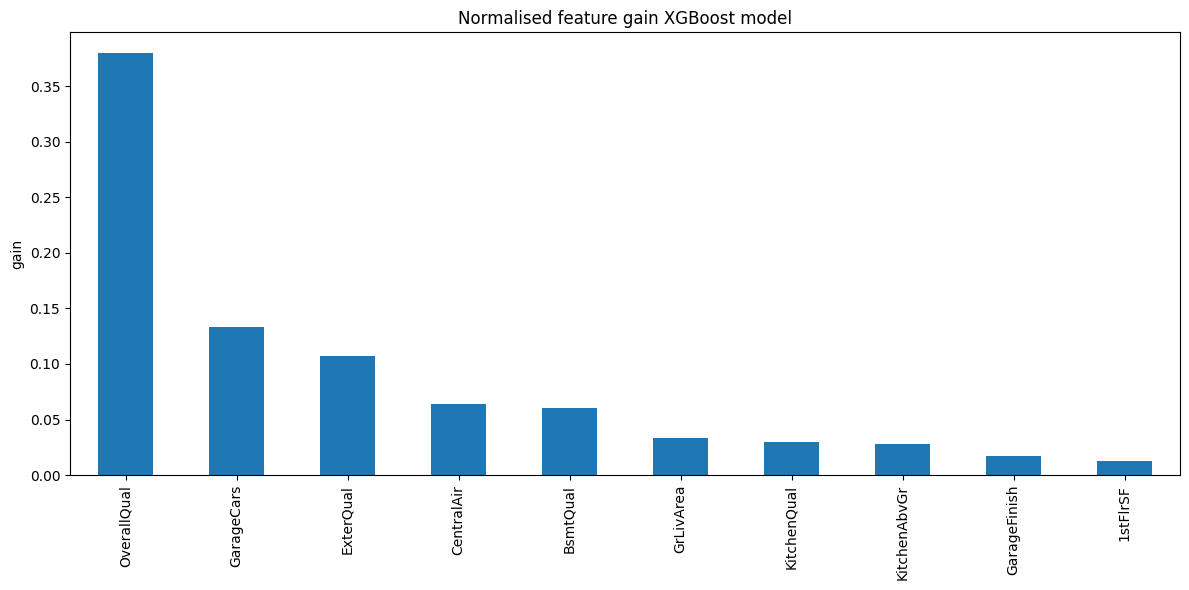

In [115]:
df_xgb_score[:10].plot(kind='bar',figsize=(12,6),legend=False)
plt.title("Normalised feature gain XGBoost model")
plt.ylabel('gain')
plt.tight_layout()
plt.show()

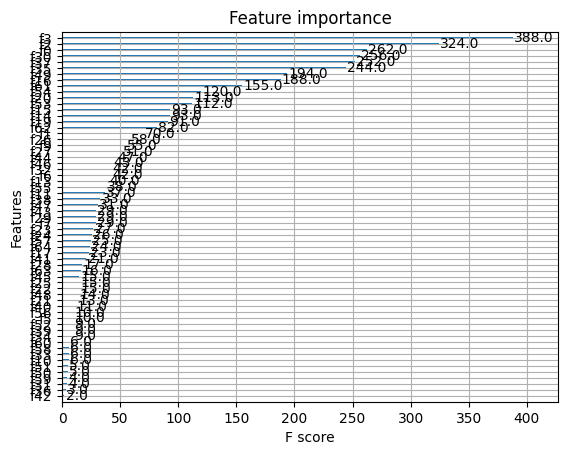

In [37]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

[('Electrical', 0.00966009870171547), ('MiscFeature', 0.007738139946013689), ('PoolArea', 0.007571340538561344), ('3SsnPorch', 0.004117248579859734), ('Street', 8.397645433433354e-05)]
